In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index=pd.read_csv("D:/Datasets/economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
#let us drop certain unnecessary cols
#we need mainly interest_rate, unemployment_rate

df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)
df_index.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

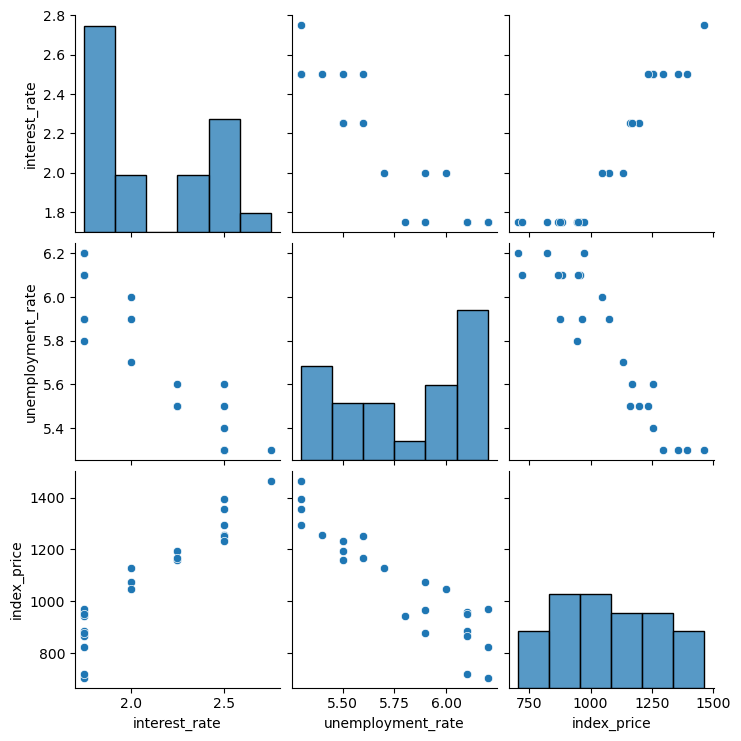

In [5]:
#Lets do visualization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [6]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [7]:
#indep and dep features
X=df_index[['interest_rate','unemployment_rate']]
#you can also do X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]   #ie taking the last col



In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)



In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)

X_test=scaler.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
regression=LinearRegression()

regression.fit(X_train,y_train)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
print(validation_score)
print(np.mean(validation_score))

[-1861.74046551 -8715.8459466  -7707.52362191 -9169.13776461
  -791.32842311]
-5649.11524435076


In [14]:
y_pred=regression.predict(X_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [15]:
#Performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)
print(mse," ",mae," ",rmse," ",score)

8108.567426306604   73.80444932337097   90.04758423359621   0.7591371539010257


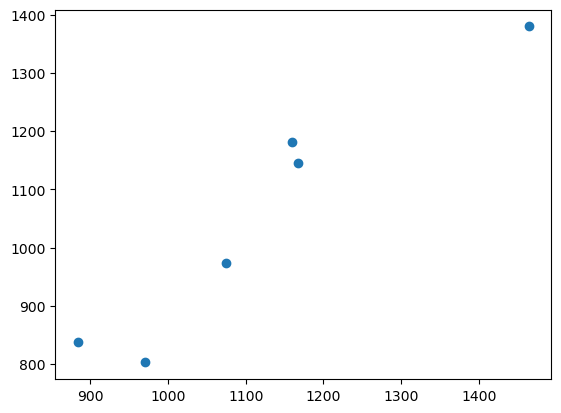

In [16]:
##Assumption    
plt.scatter(y_test,y_pred)
plt.show()

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


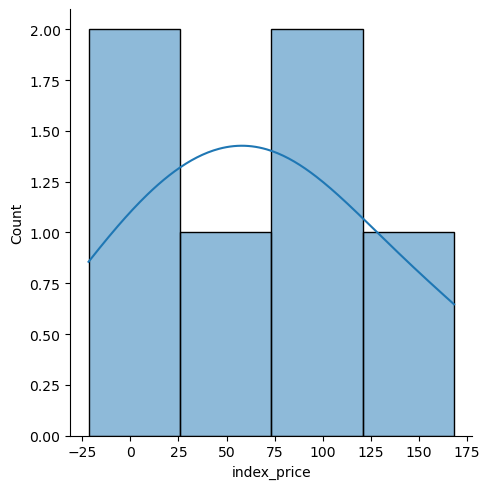

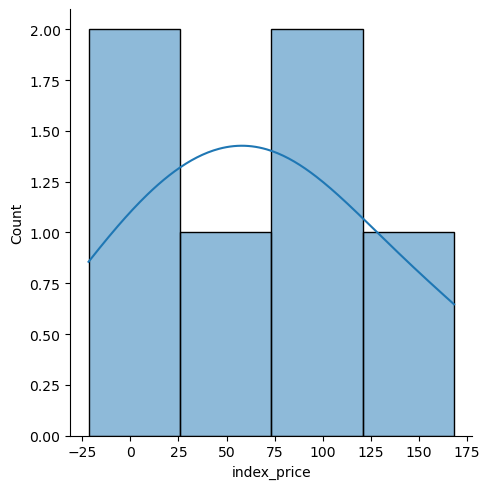

In [18]:
residuals=y_test-y_pred
print(residuals)

sns.displot(residuals,kde="kde")
plt.show()

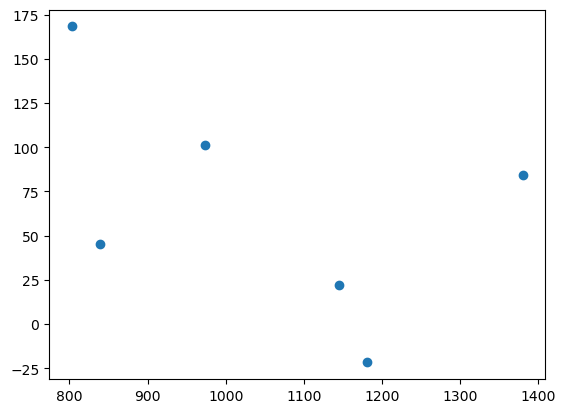

In [ ]:
plt.scatter(y_pred,residuals)    #it should be completely scattered
plt.show()